In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import os
import codecs
import pandas as pd
import html2text
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud
import seaborn


Data Loading and Cleaning

In [5]:
def load_clean_joke():

    ret_jokes = []

    for i in range(1,101):
        file = 'init'+str(i)+'.html'
        data = codecs.open('jokes/' + file, 'r', encoding="cp1252")
        joke_html = data.read()

        # Extracting joke
        joke = html2text.html2text(joke_html)
        # Extracting joke_id
        joke_id = int(file.split('init')[1].split('.html')[0])
        cleaned_string = re.sub(r'[\|]+|[-]+', '', joke)

        ret_jokes.append(cleaned_string.strip())
    
    return ret_jokes


In [6]:
Jokes = load_clean_joke()

In [7]:
from nltk.corpus import stopwords

def remove_tags_puntuatuions_tags(Joke):
    special_char_patterns = r'[^a-zA-Z0-9\s]'
    urlPatterns = r'http\S+|www\S+'

    text = Joke

    text = re.sub(special_char_patterns, ' ', text)
    text = re.sub(urlPatterns, ' ', text)
    text = re.sub(r'\n', ' ', text)

    return text

def remove_stop_words_Tokenization(Joke):
    
    stopwords_ = set(stopwords.words('english'))
    Tokenize_Joke = []
    for word in Joke.split():
        if word not in stopwords_:
            Tokenize_Joke.append(word)

    return Tokenize_Joke

def preprocess_clean_jokes(uncleaned_Jokes):

    Cleaned_Jokes = []

    for Joke in uncleaned_Jokes:
        # Remove puntuations and tags from the data
        Joke = remove_tags_puntuatuions_tags(Joke)
        # Correct Spelling
        Joke = TextBlob(Joke)
        # Remove Stop Words and do Tokenization of Joke
        Joke = remove_stop_words_Tokenization(Joke)

        Cleaned_Jokes.append(Joke)

    return Cleaned_Jokes



In [8]:
preprocessed_jokes = preprocess_clean_jokes(Jokes)

In [9]:
dataset1 = pd.read_excel("jester-data-1.xls")
dataset2 = pd.read_excel("jester-data-2.xls")
dataset3 = pd.read_excel("jester-data-3.xls")

In [10]:
def insert_return(frame):
    ret_lst = []
    for index,row in frame.iterrows():
        ret_lst.append(list(row))
    
    return ret_lst

def combine_dataframe(frame1, frame2, frame3):
    joke_lst = ["Number of jokes rated"]
    for i in range(100):
        joke_lst.append(f"joke-{i}")

    rating_lst = []

    rating_lst.extend(insert_return(frame1))
    rating_lst.extend(insert_return(frame2))
    rating_lst.extend(insert_return(frame3))

    return pd.DataFrame(data=rating_lst,columns=joke_lst)


In [11]:
dataframe = combine_dataframe(dataset1, dataset2,dataset3)

In [12]:
dataframe = dataframe.replace(99,np.nan)

In [13]:
dataframe

,Number of jokes rated,joke-0,joke-1,joke-2,joke-3,joke-4,joke-5,joke-6,joke-7,joke-8,...,joke-90,joke-91,joke-92,joke-93,joke-94,joke-95,joke-96,joke-97,joke-98,joke-99
0,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
2,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
3,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,100.0,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73413,21.0,NaN,NaN,NaN,NaN,5.78,8.45,NaN,8.20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73414,16.0,NaN,NaN,NaN,NaN,5.24,NaN,NaN,5.68,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73415,35.0,NaN,NaN,NaN,NaN,-3.93,NaN,-9.03,-2.67,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73416,21.0,NaN,NaN,NaN,NaN,9.42,9.66,NaN,9.17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


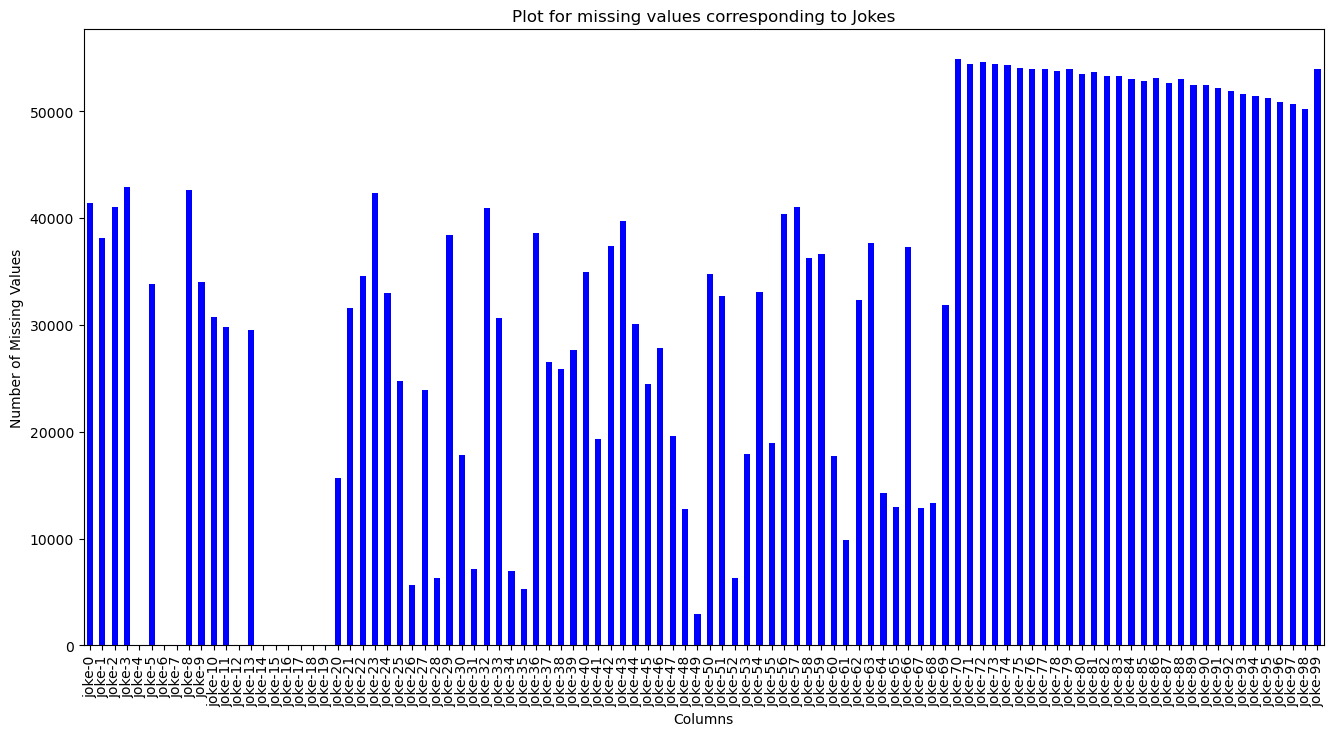

In [14]:
df = dataframe.drop(columns=["Number of jokes rated"])

missing_values = df.isnull().sum()

plt.figure(figsize=(16, 8))
missing_values.plot(kind='bar', color='blue')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Plot for missing values corresponding to Jokes')
plt.xticks(rotation=90)
plt.show()

In [15]:
dataframe = dataframe.fillna(dataframe.median())

When data contains outliers, the mean can be significantly influenced by these extreme values, leading to an inaccurate representation of the central tendency of the majority of the data. In such cases, using the median as an imputation method is more appropriate because it represents the middle value when the data is sorted, regardless of extreme outliers, resulting in a more robust and stable estimate of the central value.

In [16]:
dataframe

,Number of jokes rated,joke-0,joke-1,joke-2,joke-3,joke-4,joke-5,joke-6,joke-7,joke-8,...,joke-90,joke-91,joke-92,joke-93,joke-94,joke-95,joke-96,joke-97,joke-98,joke-99
0,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,49.0,1.60,0.73,0.68,-1.41,9.03,9.27,9.03,9.27,-0.24,...,2.77,1.80,2.91,9.08,1.70,1.99,2.23,1.50,0.34,1.84
2,48.0,1.60,8.35,0.68,-1.41,1.80,8.16,-2.82,6.21,-0.24,...,2.77,1.80,2.91,0.53,1.70,1.99,2.23,1.50,0.34,1.84
3,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,100.0,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73413,21.0,1.60,0.73,0.68,-1.41,5.78,8.45,-0.29,8.20,-0.24,...,2.77,1.80,2.91,1.65,1.70,1.99,2.23,1.50,0.34,1.84
73414,16.0,1.60,0.73,0.68,-1.41,5.24,1.89,-0.29,5.68,-0.24,...,2.77,1.80,2.91,1.65,1.70,1.99,2.23,1.50,0.34,1.84
73415,35.0,1.60,0.73,0.68,-1.41,-3.93,1.89,-9.03,-2.67,-0.24,...,2.77,1.80,2.91,1.65,1.70,1.99,2.23,1.50,0.34,1.84
73416,21.0,1.60,0.73,0.68,-1.41,9.42,9.66,-0.29,9.17,-0.24,...,2.77,1.80,2.91,1.65,1.70,1.99,2.23,1.50,0.34,1.84


summary statistics and data visualization

In [17]:
def plot_statistical_features(features, names,Feature_Name):
    plt.figure(figsize=(20, 16))
    plt.scatter(range(1, len(features) + 1), features, marker='o', color='b')
    
    # Adjust the rotation angle and label skipping
    plt.xticks(range(1, len(features) + 1), rotation=45)
    
    plt.xlabel('Jokes')
    plt.ylabel(Feature_Name)
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.show()


In [18]:
temp_frame = dataframe.drop(columns=["Number of jokes rated"])

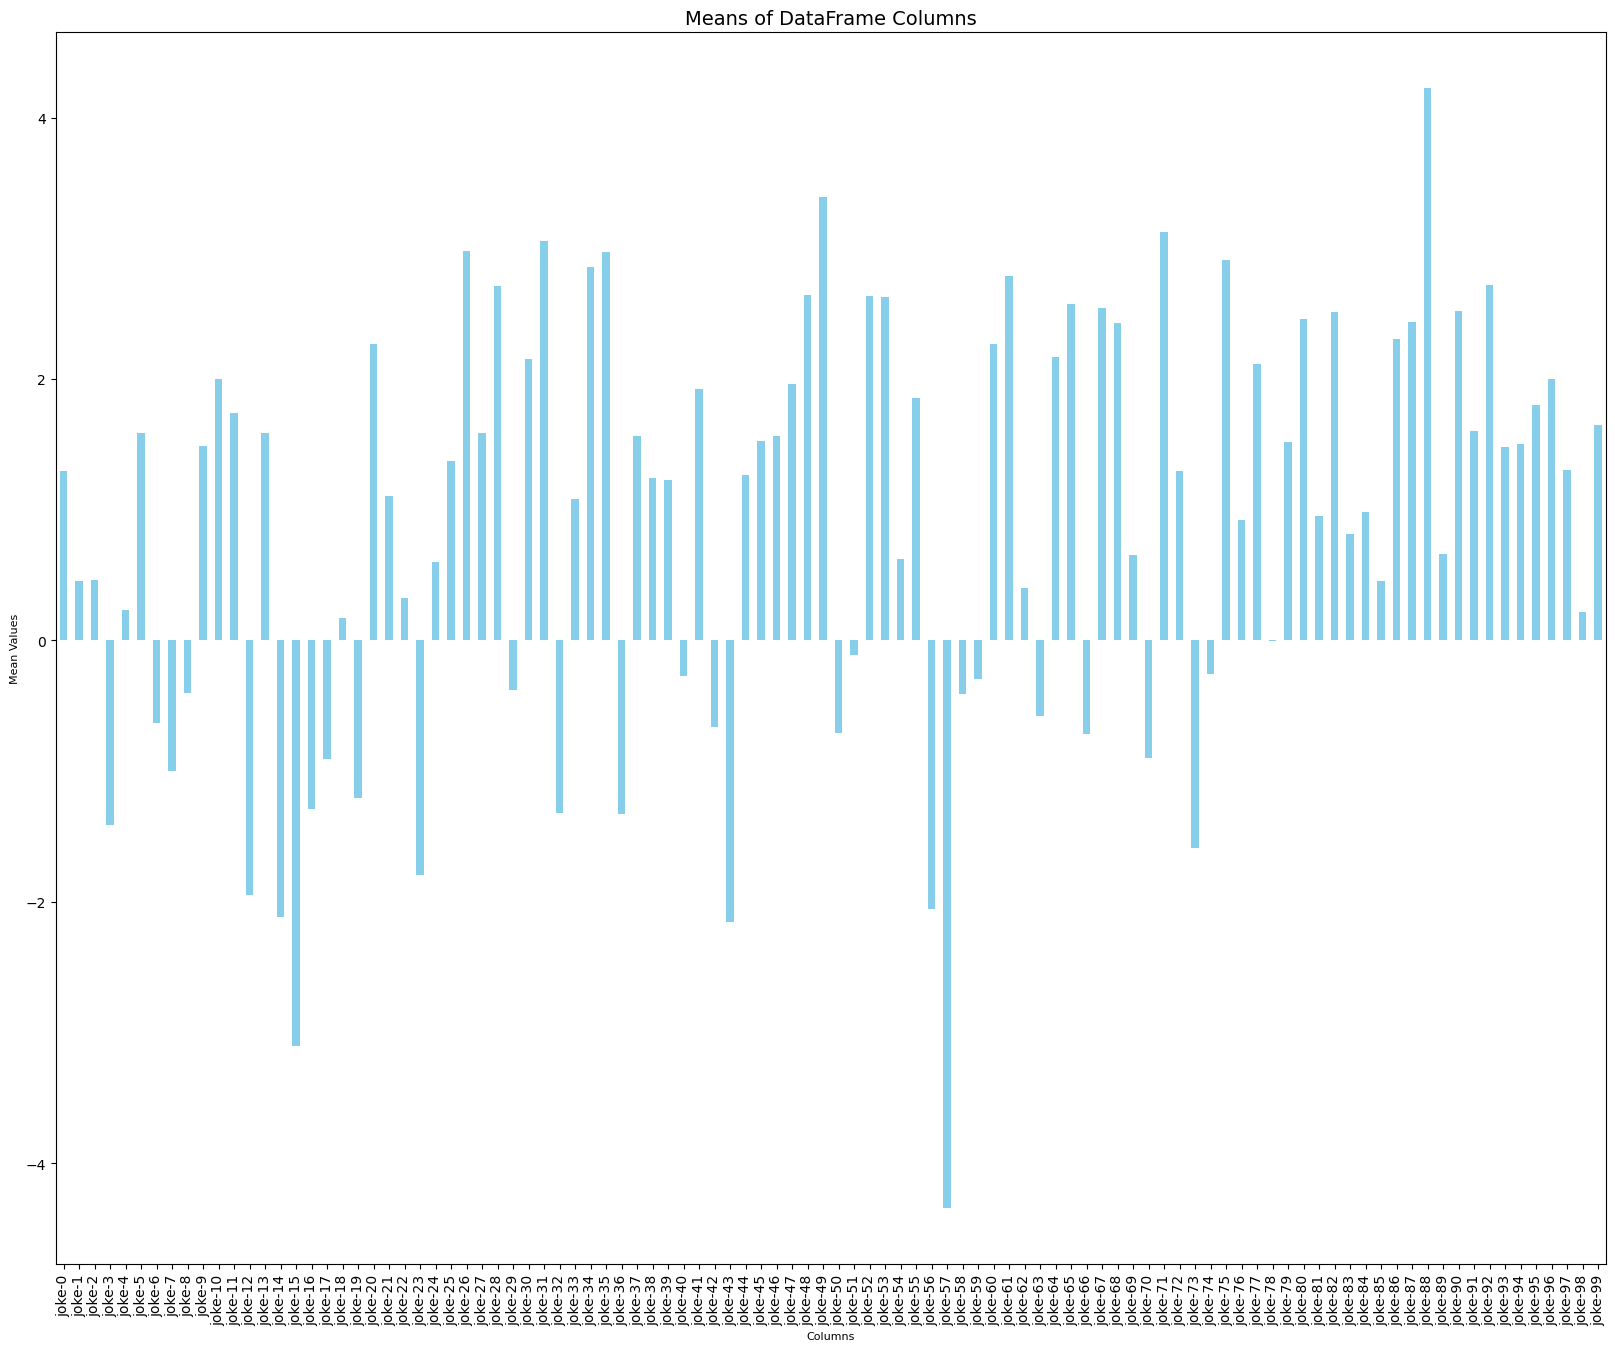

In [19]:
column_means = temp_frame.mean()

plt.figure(figsize=(20, 16))
column_means.plot(kind='bar', color='skyblue')
plt.xlabel('Columns', fontsize=8)
plt.ylabel('Mean Values', fontsize=8)
plt.title('Means of DataFrame Columns', fontsize=14)
plt.xticks(rotation=90)
plt.show()

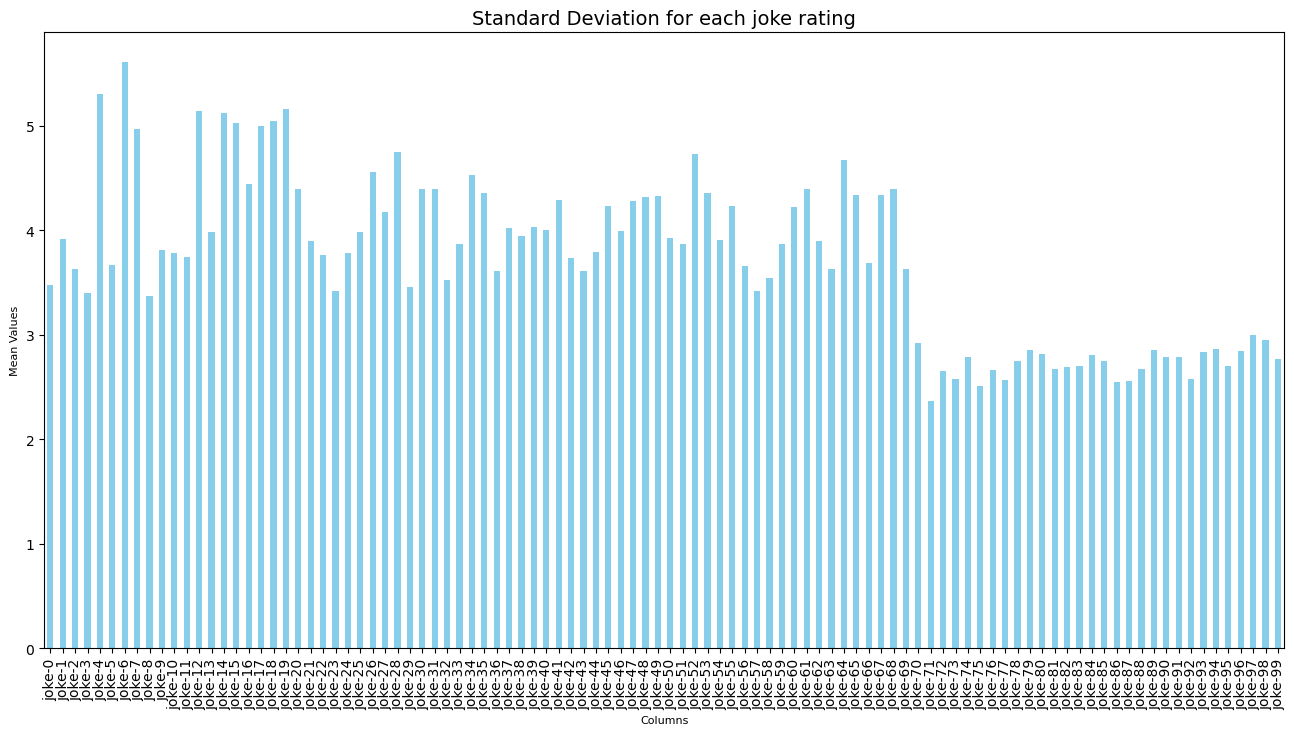

In [20]:
column_means = temp_frame.std()

plt.figure(figsize=(16, 8))
column_means.plot(kind='bar', color='skyblue')
plt.xlabel('Columns', fontsize=8)
plt.ylabel('Mean Values', fontsize=8)
plt.title('Standard Deviation for each joke rating', fontsize=14)
plt.xticks(rotation=90)
plt.show()

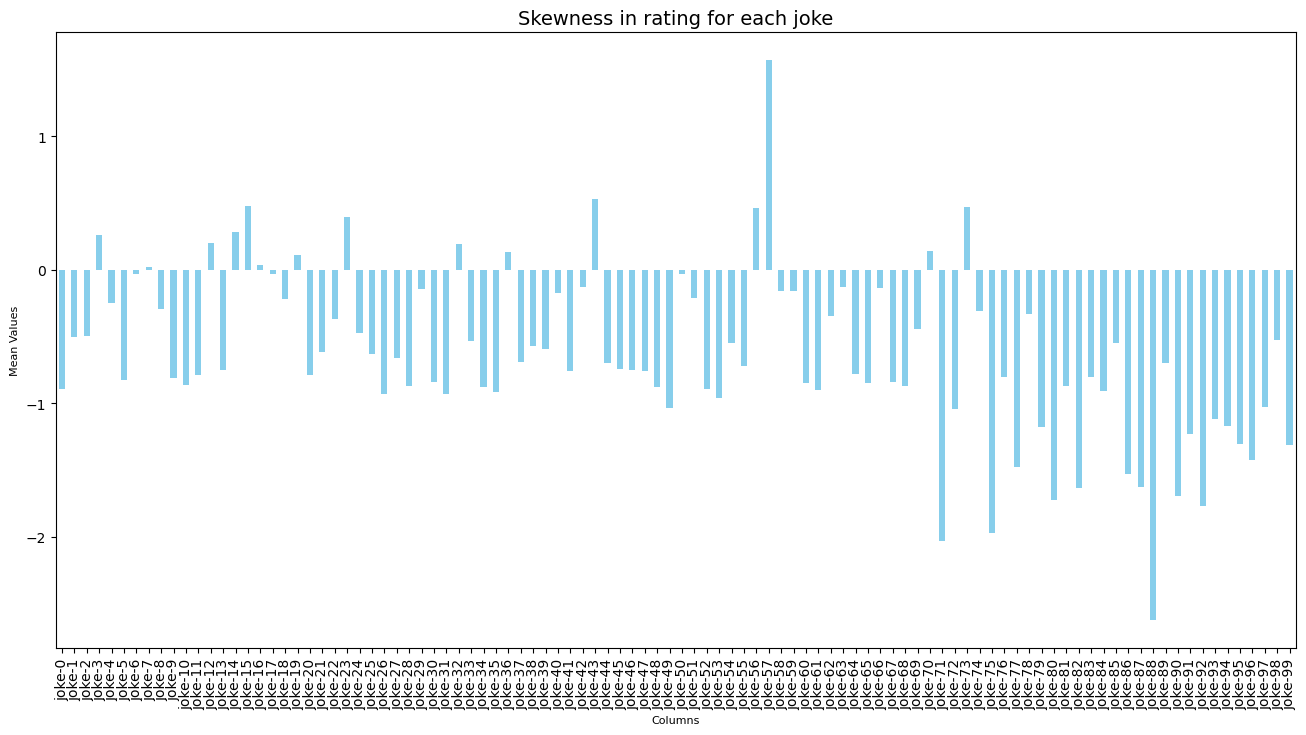

In [21]:
column_means = temp_frame.skew()

plt.figure(figsize=(16, 8))
column_means.plot(kind='bar', color='skyblue')
plt.xlabel('Columns', fontsize=8)
plt.ylabel('Mean Values', fontsize=8)
plt.title('Skewness in rating for each joke', fontsize=14)
plt.xticks(rotation=90)
plt.show()

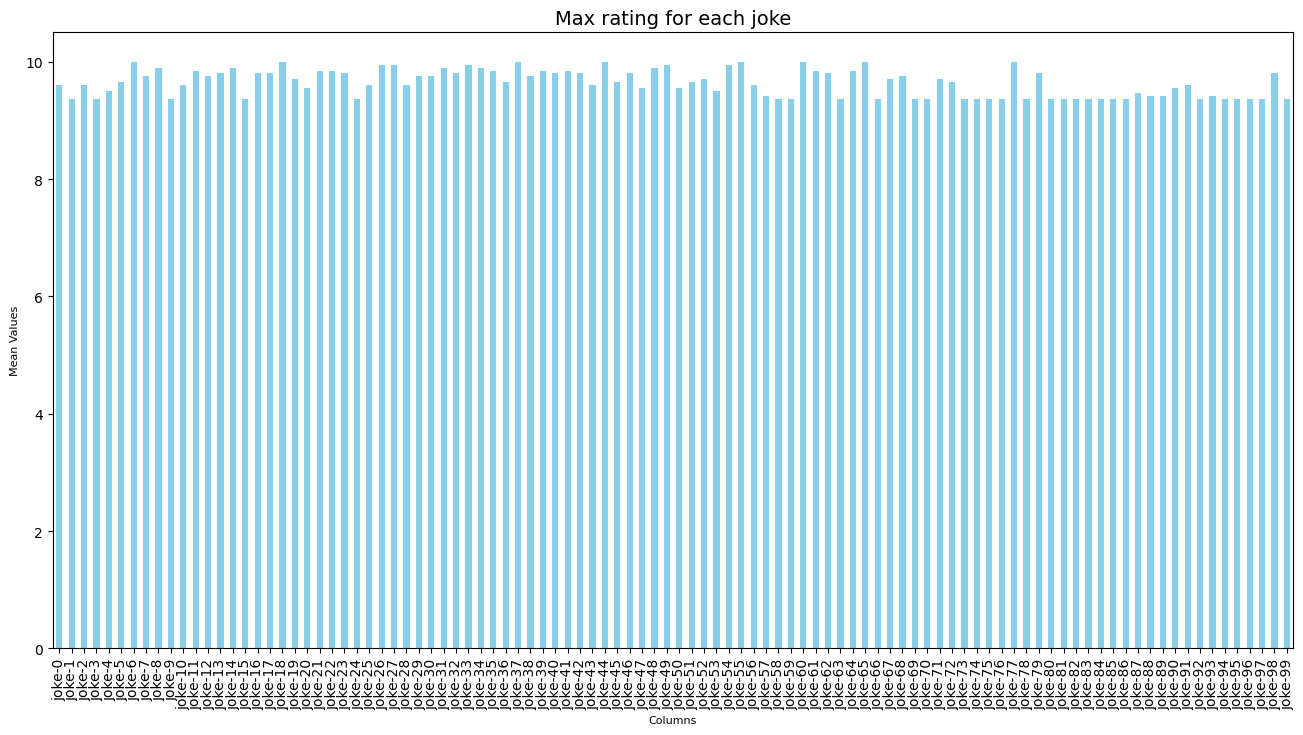

In [22]:
column_means = temp_frame.max()

plt.figure(figsize=(16, 8))
column_means.plot(kind='bar', color='skyblue')
plt.xlabel('Columns', fontsize=8)
plt.ylabel('Mean Values', fontsize=8)
plt.title('Max rating for each joke', fontsize=14)
plt.xticks(rotation=90)
plt.show()


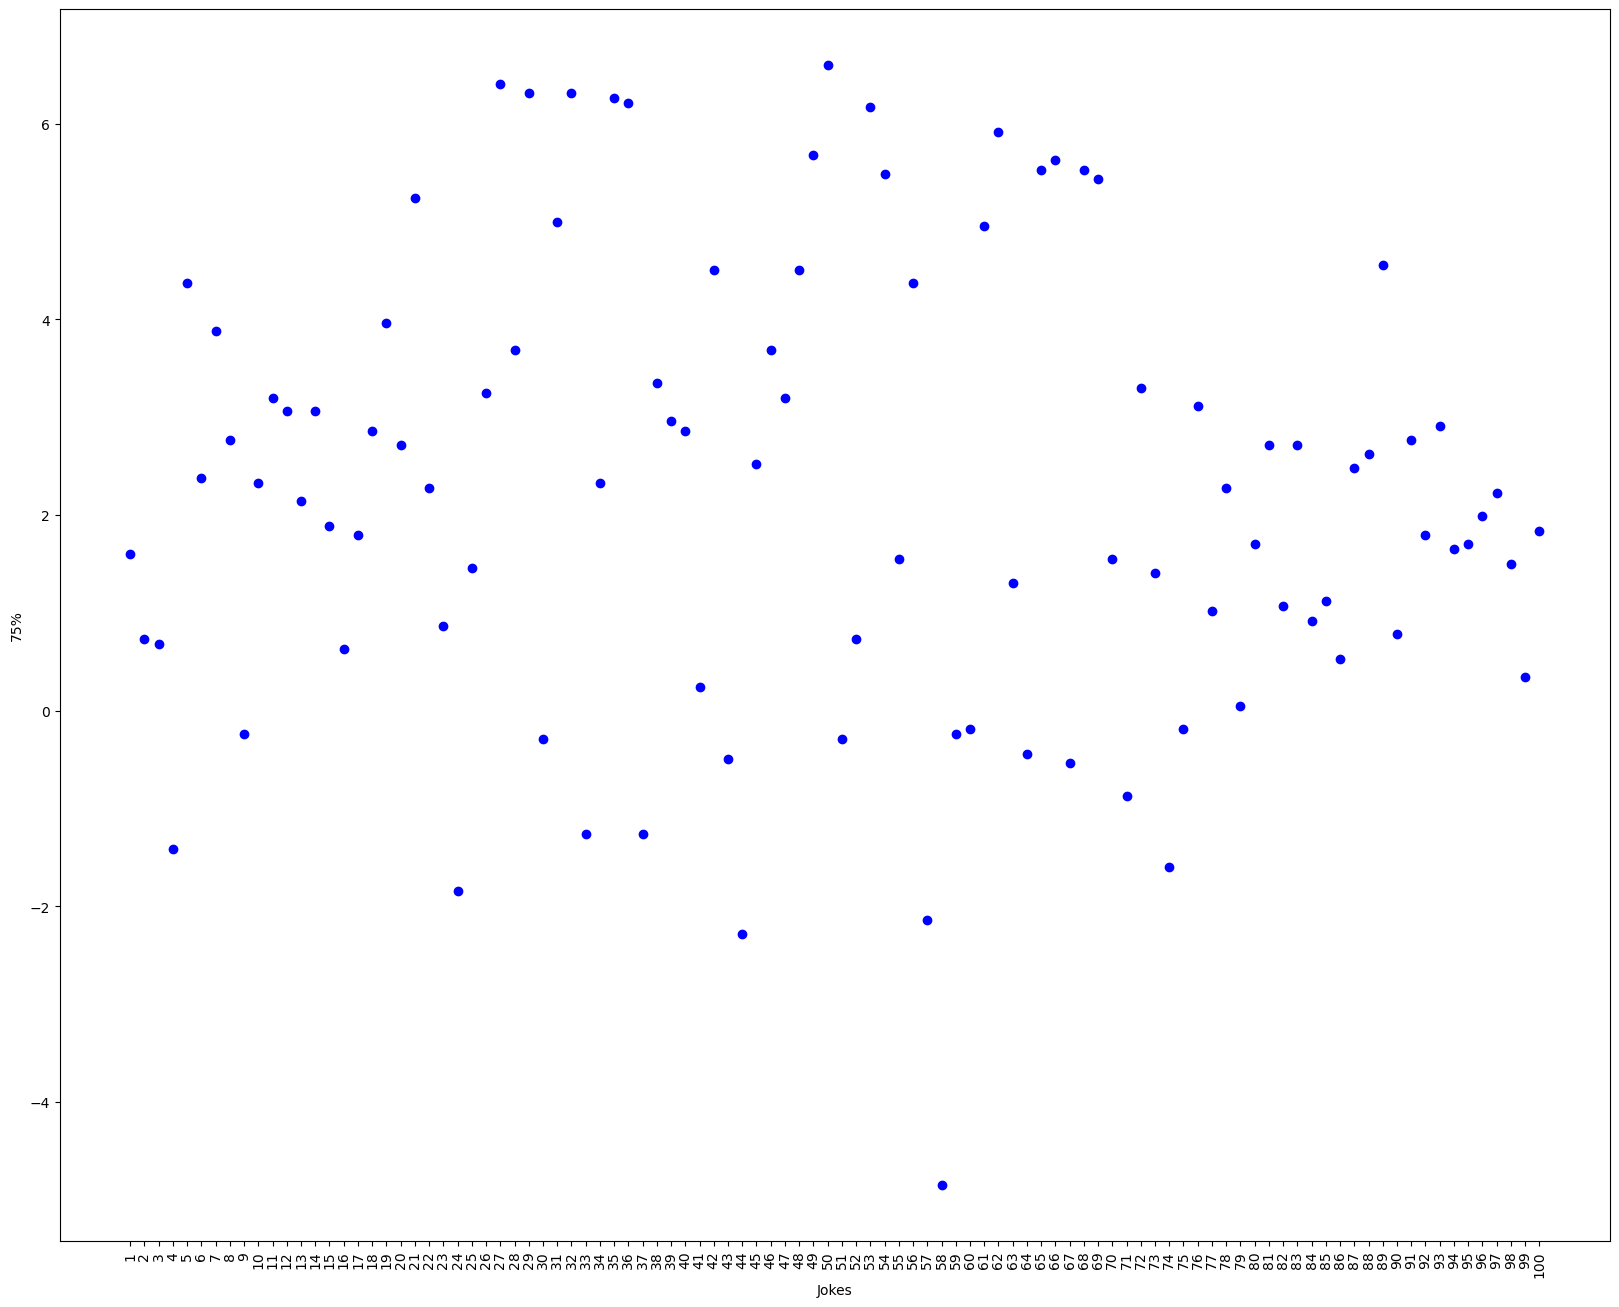

In [23]:
plot_statistical_features(list(dataframe.describe().loc['75%'])[1:],list(dataframe.columns)[1:],"75%")

In [24]:
EDA_Frame = dataframe.copy()
No_Jokes_Rated = EDA_Frame["Number of jokes rated"]
EDA_Frame.drop(columns=["Number of jokes rated"],inplace=True)

In [25]:
Rating_Threshold = 2 # Need to find an appropriate threshold for that

Based on the above threshold, separate jokes into two groups, and then visualize a word cloud for each group.

In [26]:
GoodJokes = EDA_Frame.mean()[EDA_Frame.mean() >= Rating_Threshold]
BadJokes = EDA_Frame.mean()[EDA_Frame.mean() < Rating_Threshold]


In [27]:
good_jokes = []
for joke_id, mean_rating in GoodJokes.iteritems():
    good_jokes.append(Jokes[int(joke_id.split('-')[-1])])

bad_jokes = []
for joke_id, mean_rating in BadJokes.iteritems():
    bad_jokes.append(Jokes[int(joke_id.split('-')[-1])])

In [28]:
def create_word_cloud(text_list, width=800, height=400):
    text = ' '.join(text_list)

    wordcloud = WordCloud(width=width, height=height, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

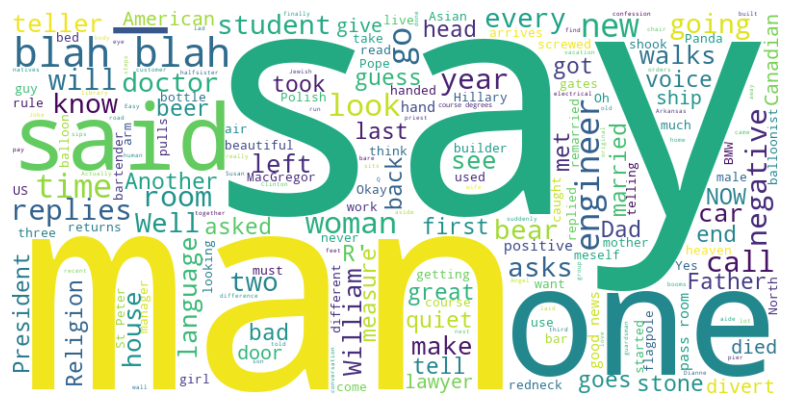

In [29]:
create_word_cloud(good_jokes)

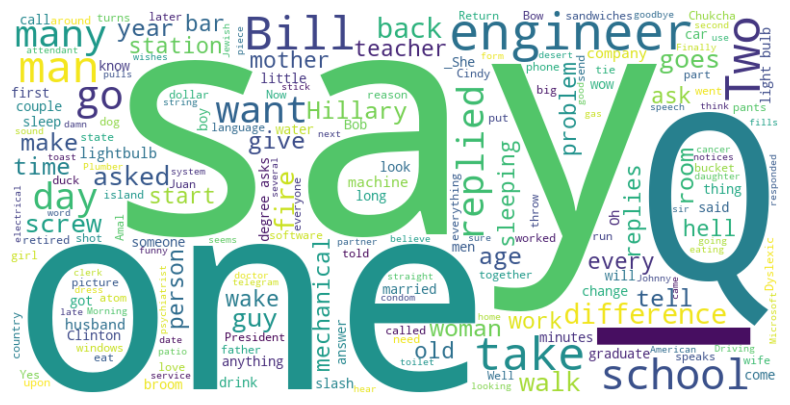

In [30]:
create_word_cloud(bad_jokes)

In [31]:
JokeRatings = list(EDA_Frame.mean())
JokeLength = [len(joke) for joke in Jokes]

visualizing average joke-rating vs joke-length relation

In [32]:
def fit_and_plot_curve(x_data, y_data, plot_title="Scatter Plot",y_title="length of joke"):

    plt.scatter(x_data, y_data, label='Data', color='blue')


    plt.xlabel(y_title)
    plt.ylabel('rating ')
    plt.legend()
    plt.title(plot_title)

    plt.show()



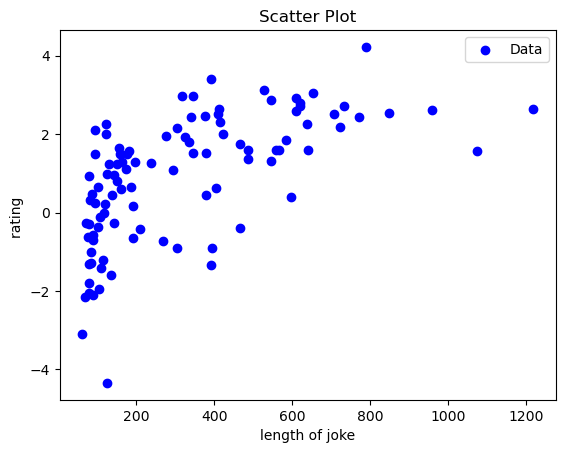

In [33]:
fit_and_plot_curve(x_data=JokeLength, y_data=JokeRatings)

In [34]:
mean_ratings = list(EDA_Frame.mean())
max_rating_index = mean_ratings.index(max(mean_ratings))
min_rating_index = mean_ratings.index(min(mean_ratings))

In [35]:
print(Jokes[max_rating_index])

_A radio conversation of a US naval ship with Canadian authorities ..._

Americans: Please divert your course 15 degrees to the North to avoid a
collision.

Canadians: Recommend you divert YOUR course 15 degrees to the South to avoid a
collision.

Americans: This is the Captain of a US Navy ship. I say again, divert YOUR
course.

Canadians: No. I say again, you divert YOUR course.

Americans: This is the aircraft carrier USS LINCOLN, the second largest ship
in the United States' Atlantic Fleet. We are accompanied by three destroyers,
three cruisers and numerous support vessels. I demand that you change your
course 15 degrees north, that's ONE FIVE DEGREES NORTH, or countermeasures
will be undertaken to ensure the safety of this ship.

Canadians: _This is a lighthouse. Your call_.


In [36]:
print(Jokes[min_rating_index])

How many teddybears does it take to change a lightbulb?

It takes only one teddybear, but it takes a whole lot of lightbulbs.


In [37]:
def count_punctuation(text):
    punctuation_pattern = r"[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]"
    
    punctuation_matches = re.findall(punctuation_pattern, text)
    
    punctuation_count = len(punctuation_matches)
    
    return punctuation_count

In [38]:
puntuations_count = [count_punctuation(text) for text in Jokes]

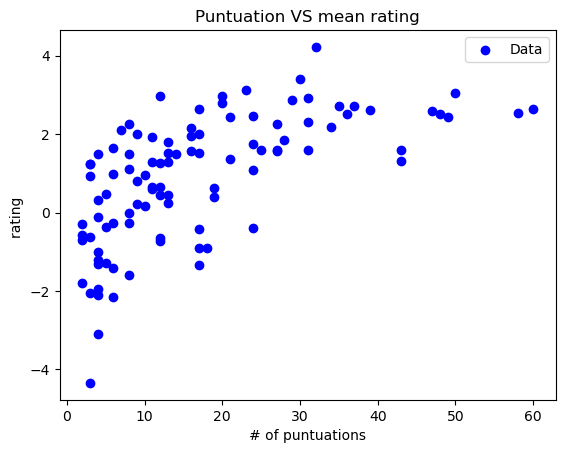

In [39]:
fit_and_plot_curve(x_data=puntuations_count, y_data=mean_ratings,plot_title="Puntuation VS mean rating",y_title="# of puntuations")

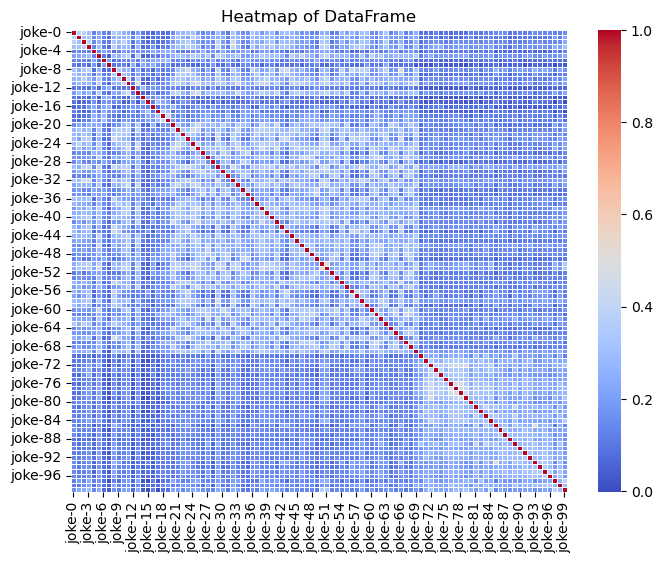

In [40]:
df = EDA_Frame.corr()

plt.figure(figsize=(8, 6))
seaborn.heatmap(df, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of DataFrame")
plt.show()